In [1]:
%load_ext autoreload
% autoreload 2

In [3]:
from SceneR2 import yolov3
from SceneR2.core import *
from SceneR2.yolov3 import VideoPipeline
from matplotlib import patches
import warnings

warnings.simplefilter('ignore')

In [17]:
video = get_frames("../data/Daimler/100_vids/object_detection/20170207_061253_Video.mp4")
video = np.stack([f for f in video])
video = np.moveaxis(video, 1, 3)

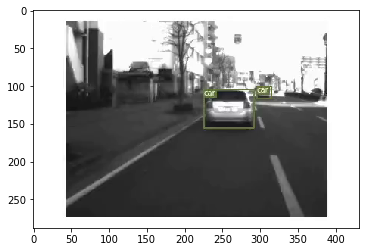

In [18]:
plt.imshow(video[0])

In [35]:
from SceneR2.dataset import SingleCAN
val_1 = []
val_2 = []
for img in video:
    val_1.append(SingleCAN.get_rising_edge(pd.Series(img[200,:,1]), last=False))
    val_2.append(SingleCAN.get_falling_edge(pd.Series(img[200,:,1]), last=True))
np.argmin(val_1), np.argmax(val_2)

(143, 203)

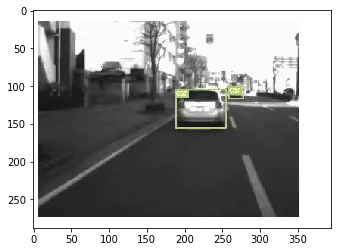

In [33]:
plt.imshow(video[1,:,37:,:])

In [14]:
pip = VideoPipeline(batch_sz=8, img_size=416)

In [15]:
vid_path = pip.vid2vid("../data/Daimler/100_vids/videos/20170207_061253_Video.mp4", "../data/Daimler/100_vids/object_detection")

KeyboardInterrupt: 

In [5]:
vid_path = '../data/Daimler/100_vids/object_detection/20170207_061253_Video.mp4'

In [6]:
Video(vid_path)

464.0


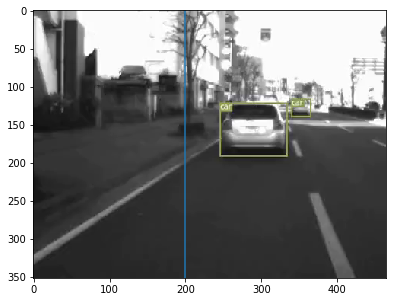

In [21]:
for f in imageio.get_reader(vid_path):
    plt.imshow(f)
    plt.tight_layout(pad=0)
    plt.axvline(200)
    print(np.diff(plt.xlim())[0])
    
    break

(0.0, 1.0)

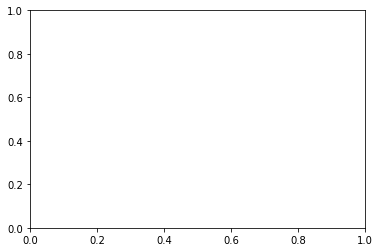

In [18]:
plt.xlim()

In [11]:
video = np.asarray([f for f in imageio.get_reader(vid_path)])

In [13]:
video[0].shape

(352, 464, 3)

In [ ]:
with open("../data/Daimler/100_vids/images/path_and_predictions.pkl", "rb") as f:
    source_path, img_detections = pickle.load(f)

In [ ]:
detections = img_detections[0]

In [ ]:
unique_labels = detections[:, -1].cpu().unique()

In [ ]:
n_cls_preds = len(unique_labels)

In [ ]:
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
import random
bbox_colors = random.sample(colors, n_cls_preds)

In [ ]:
from PIL import Image
img = np.asarray(Image.open("../data/Daimler/100_vids/images/raw/20170207_061253_Video/0000.png"))

In [ ]:
# img = video[0]
fig, ax  = plt.subplots(1, tight_layout=True)
ax.imshow(img)
p = patches.Rectangle((198,144), width=320-198, height=236-144, linewidth=2, facecolor='none', edgecolor='red')
ax.add_patch(p)

In [ ]:
img = np.asarray(Image.open("../SceneR2WebApp/webapp/static/data/image.png"))

In [ ]:
plt.imshow(img)

In [ ]:
from bokeh.plotting import ColumnDataSource, figure
from bokeh.models.widgets import Slider

In [ ]:
csv = read_csv_auto("../data/Daimler/100_vids/csv/20170207_061253_S235_500K_V173015_LW_DML.csv")
scr = ColumnDataSource(csv)

In [44]:
fig = figure(title="Some Figure")

In [46]:
fig.

NameError: name 'src' is not defined